In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

K-means is a type of unsupervised learning method, therefore there are no classes per say. However I generate the data with distinctive classes for easy visulization. Later we will find that the no. of centroids we choose will be similar to the no. of classes for generated data.

In [13]:
N = 80 # number of points per class
D = 2 # dimensionality, we use 2D data for easy visulization
K = 3 # number of classes 
X = np.zeros((N * K, D), dtype = float) # data matrix (each row = single example, can view as xy coordinates)

In [22]:
for i in range(K):
    r = np.linspace(0.05, 1, N).reshape(-1, 1) # radius
    t = np.random.normal(0, 0.4, (N, 1)) # theta
    X[i * N:(i + 1) * N] = np.append(r * np.sin(t) + i/2, r * np.cos(t) - 2*i/2, axis = 1)

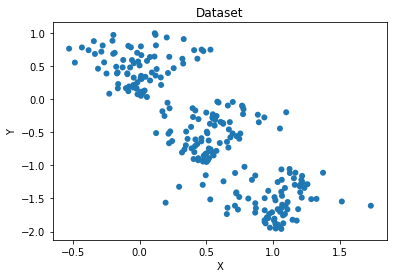

In [23]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], palette = sns.color_palette('deep', K), edgecolor = "none")
plt.title('Dataset')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [68]:
def update_label(X, centroid):
    m, K = X.shape[0], centroid.shape[0]            
    dist = np.zeros((m, K))           
    label = np.zeros((m, 1))           
    
    for i in range(m):
        for j in range(K):
            dist[i,j] = np.dot((X[i, :] - centroid[j, :]).T, (X[i, :] - centroid[j, :]))
    
    label = np.argmin(dist, axis = 1)      
    total_dist = np.sum(np.choose(label, dist.T))
    return label, total_dist
             

def update_centroid(X, label, K):
    D = X.shape[1]
    centroid = np.zeros((K, D))
    for i in range(K):
        centroid[i, :] = np.mean(X[label.flatten() == i, :], axis=0).reshape(1,-1)
    return centroid


def init_centroid(X, K):
    m = X.shape[0]
    idx = np.random.choice(m, K, replace = False)
    return X[idx, :]

In [69]:
def k_means(X, K, num_iters = 100):
    m = X.shape[0]
    centroid = init_centroid(X, K)
    label = np.zeros((m, 1))
    
    for _ in range(num_iters):
        label, total_dist = update_label(X, centroid)
        centroid = update_centroid(X, label, K)

    return centroid, label, total_dist

In [51]:
centroid, label, _ = k_means(X, K, num_iters = 100)

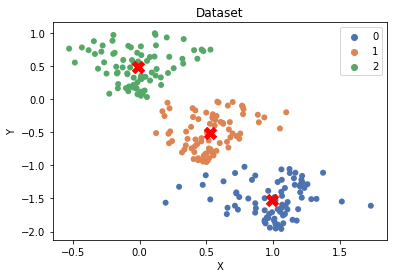

In [48]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = label, palette = sns.color_palette('deep', K), edgecolor = "none")
sns.scatterplot(x = centroid[:, 0], y = centroid[:, 1], marker = "x", facecolor='red', s = 10**2, linewidth = 5)
plt.title('Dataset')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [70]:
dist = [0]*10
for i in range(10):
    _, _, dist[i] = k_means(X, i + 1, num_iters = 100)

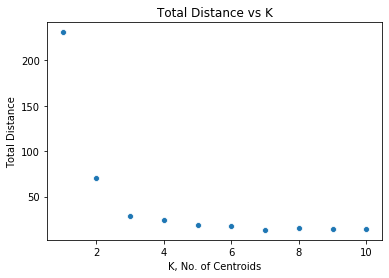

In [71]:
sns.scatterplot(range(1, 11), dist)
plt.title('Total Distance vs K')
plt.ylabel('Total Distance')
plt.xlabel('K, No. of Centroids')
plt.show()